<a href="https://colab.research.google.com/github/fatimataba21/Projet_23203/blob/main/23203_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <!-- TITLE --> [MNIST2] - Simple classification with CNN
<!-- DESC --> An example of classification using a convolutional neural network for the famous MNIST dataset


## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network
 - Implementation with Keras


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - librairies

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Step 2 - Split data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1) ## 28 pixels, 1 le vecteur qui correspond au niveau de gris, dans le cas de rvb nous aurons 3 composantes
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [ ]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max())) # 0 = blanc & 1 = Noir

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


In [ ]:
xmax

255

### Have a look

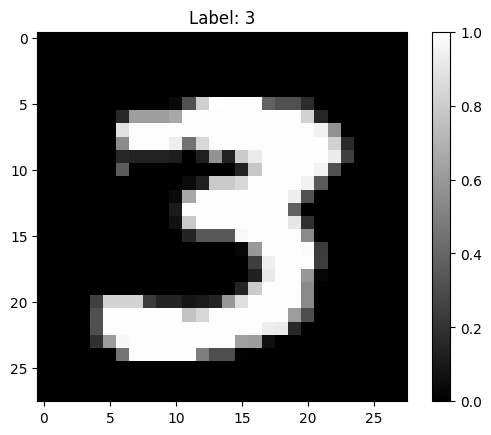

In [ ]:
plt.imshow(x_train[27], cmap='gray')
plt.title(f"Label: {y_train[27]}")
plt.colorbar()
plt.show()

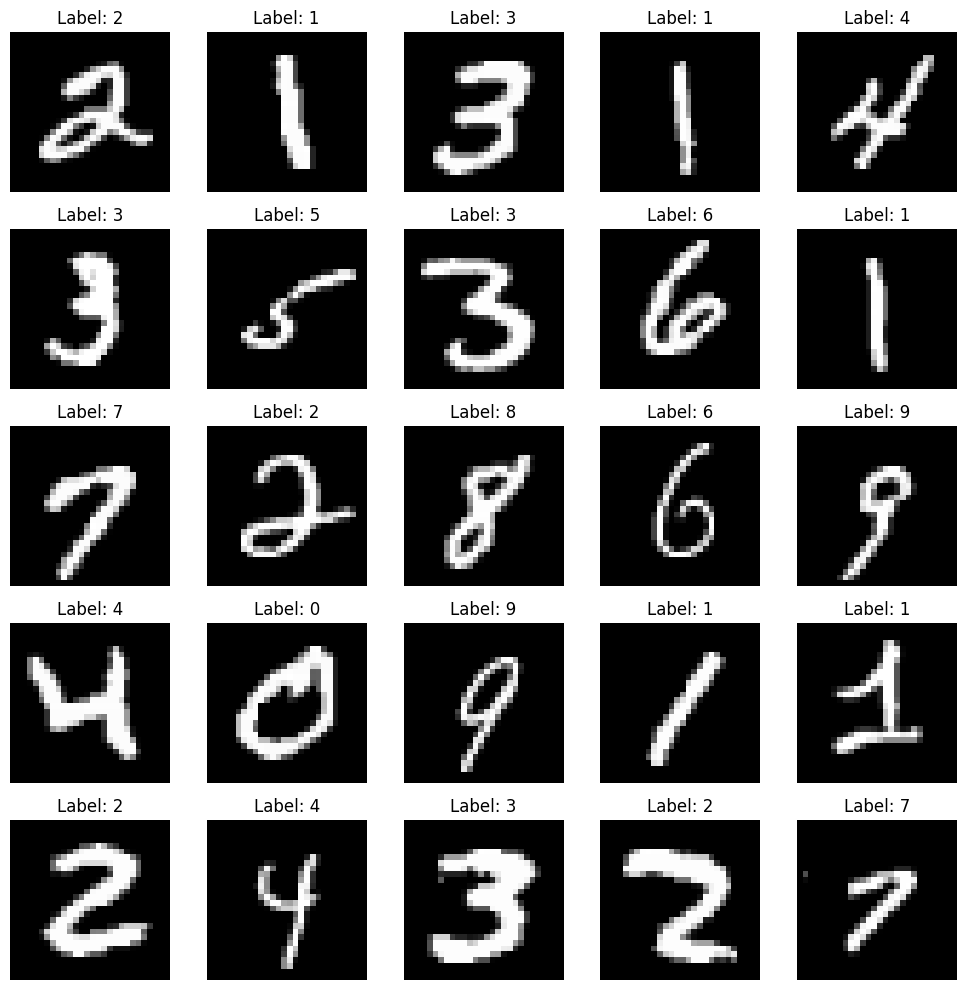

In [ ]:
# Sélection d'un sous-ensemble d'images
indices = list(range(5, 30))  # Indices des images à afficher
num_images = len(indices)
columns = 5  # Nombre de colonnes pour l'affichage
rows = (num_images // columns) + (num_images % columns > 0)  # Nombre de lignes

fig, axes = plt.subplots(rows, columns, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        index = indices[i]
        image = x_train[index]
        label = y_train[index]

        ax.imshow(image, cmap='gray')  # Utilise 'gray' pour images en niveaux de gris
        ax.set_title(f"Label: {label}")
        ax.axis("off")  # Cache les axes
    else:
        ax.axis("off")  # Cache les cases vides

plt.tight_layout()
plt.show()

## Step 4 - Create model
About informations about :
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [ ]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) ) # input 28*28 with 1 dim

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') ) ## 8 layers Conv, Kernel = 3*3
model.add( keras.layers.MaxPooling2D((2,2))) ## MaxPoling =2*2
model.add( keras.layers.Dropout(0.2)) ## Lors de l'apprentissage désactiver aleatoirement certains neurons
# l'interêt : c'est repartir l'apprentissage sur l'ensemble des neurones, surtout que certains prennent plus d'importance
# Comme ils vont etre desactivés cycliquemment ça va permettre de reporter le processus apprentissage sur la totalité des neurones
# C'est plus efficient encore
model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5 - Train the model

In [ ]:
batch_size  = 512 # c’est-à-dire le nombre d’images utilisées pour entrainer le réseau
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.4650 - loss: 1.5854 - val_accuracy: 0.9294 - val_loss: 0.2597
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.8710 - loss: 0.4231 - val_accuracy: 0.9538 - val_loss: 0.1618
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9099 - loss: 0.2988 - val_accuracy: 0.9637 - val_loss: 0.1209
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9282 - loss: 0.2392 - val_accuracy: 0.9693 - val_loss: 0.0987
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9357 - loss: 0.2104 - val_accuracy: 0.9727 - val_loss: 0.0900
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9422 - loss: 0.1865 - val_accuracy: 0.9765 - val_loss: 0.0755
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9479 - loss: 0.1734 - val_accuracy: 0.9788 - val_loss: 0.0680
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9519 - loss: 0.1572 -

#Verbose est une valeur entière-0, 1 ou 2. Cette valeur permet de sélectionner la façon dont la progression est affichée pendant l'entraînement. Verbose = 0: Mode silencieux – Rien ne s'affiche dans ce mode. Verbose = 1: une barre illustrant la progression de l'entraînement s'affiche

## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.9%

In [ ]:
score = model.evaluate(x_test, y_test)

### 6.2 - Plot history

In [ ]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

In [ ]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

In [ ]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

In [ ]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [ ]:
pwk.end()

<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>